In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [406]:
df = pd.read_csv("/kaggle/input/t1hacklol/data_for_spb_hakaton_entities1-Table 1.csv", sep=";", header=0, skiprows=1)

In [407]:
df["create_date"] = pd.to_datetime(df["create_date"])

In [408]:
df

,entity_id,area,type,status,state,priority,ticket_number,name,create_date,created_by,...,updated_by,parent_ticket_id,assignee,owner,due_date,rank,estimation,spent,workgroup,resolution
0,94297,Система.Таск-трекер,Дефект,Закрыто,Normal,Средний,PPTS-1965,[FE] Бэклог. Кастомизация колонок. Кастомизаци...,2023-03-16 16:59:00.000000,А. К.,...,А. К.,72779.0,А. К.,А. К.,NaN,0|qzzywk:,60.0,NaN,NaN,Готово
1,102481,Система.Ошибки,История,Закрыто,Normal,Критический,PPIN-1175,[ГенераторДокументов] Интеграция со Система.Ге...,2023-05-12 13:33:55.918127,А. З.,...,NaN,3488105.0,А. Е.,А. Е.,NaN,0|qv7n1c:y,432000.0,NaN,Новая функциональность,Готово
2,1805925,Система.Таск-трекер,Дефект,Тестирование,Normal,Высокий,PPTS-3189,[FE] История изменений. Пустые строки в истори...,2023-07-12 09:36:04.479760,А. К.,...,А. К.,NaN,А. К.,А. К.,NaN,0|qzsklw:,60.0,NaN,NaN,NaN
3,1934905,Система.Таск-трекер,Дефект,Закрыто,Normal,Средний,PPTS-3383,[FE] Зависимые поля. Тип реакции disable НЕ ра...,2023-08-04 11:32:25.829919,А. Д.,...,А. К.,NaN,А. К.,Я. П.,NaN,0|qzh3e8:,NaN,NaN,NaN,Готово
4,1943849,Система.Ошибки,Дефект,Отклонен исполнителем,Normal,Низкий,PPIN-1609,[BE] При сортировке по Теме если знаки препина...,2023-08-09 06:20:44.391950,А. С.,...,А. Е.,2083371.0,А. М.,А. Ж.,NaN,0|qzzywj:zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz...,NaN,NaN,NaN,Отклонено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,5179477,Управление релизами изменениями,Задача,Закрыто,Normal,Средний,PPRC-2511,[PPPL] [FE] - Исследовать ui-kit andt на приме...,2024-09-24 12:12:21.879096,Е. Б.,...,В. М.,4933112.0,В. М.,Е. Б.,NaN,0|qm0tow:,57600.0,NaN,Новая функциональность,NaN
2481,5179714,Управление релизами изменениями,Задача,Закрыто,Normal,Средний,PPRC-2512,[PPPL] [FE] - Написать базовую структуру прило...,2024-09-24 12:18:13.307422,Е. Б.,...,В. М.,4933112.0,В. М.,Е. Б.,NaN,0|qm0sbk:,86400.0,NaN,Новая функциональность,Готово
2482,5179793,Управление релизами изменениями,Задача,Закрыто,Normal,Средний,PPRC-2513,[PPPL] [FE] - Сделать роутинги в админке плаг...,2024-09-24 12:19:51.036183,Е. Б.,...,В. М.,4933112.0,В. М.,Е. Б.,NaN,0|qm0rw0:,28800.0,NaN,Новая функциональность,Готово
2483,5179847,Управление релизами изменениями,Задача,Закрыто,Normal,Средний,PPRC-2515,[PPPL] [FE] - Написать парсинга json файла,2024-09-24 12:21:27.373853,Е. Б.,...,И. К.,4933112.0,В. М.,Е. Б.,NaN,0|qm0rko:,28800.0,NaN,Новая функциональность,Готово


In [409]:
df = df[['create_date', 'estimation']]

In [410]:
df

,create_date,estimation
0,2023-03-16 16:59:00.000000,60.0
1,2023-05-12 13:33:55.918127,432000.0
2,2023-07-12 09:36:04.479760,60.0
3,2023-08-04 11:32:25.829919,NaN
4,2023-08-09 06:20:44.391950,NaN
...,...,...
2480,2024-09-24 12:12:21.879096,57600.0
2481,2024-09-24 12:18:13.307422,86400.0
2482,2024-09-24 12:19:51.036183,28800.0
2483,2024-09-24 12:21:27.373853,28800.0


/tmp/ipykernel_30/2350415674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['estimation'], inplace=True)
/tmp/ipykernel_30/2350415674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estimation'] = df['estimation']#.apply(lambda x: float(x) // 3600)


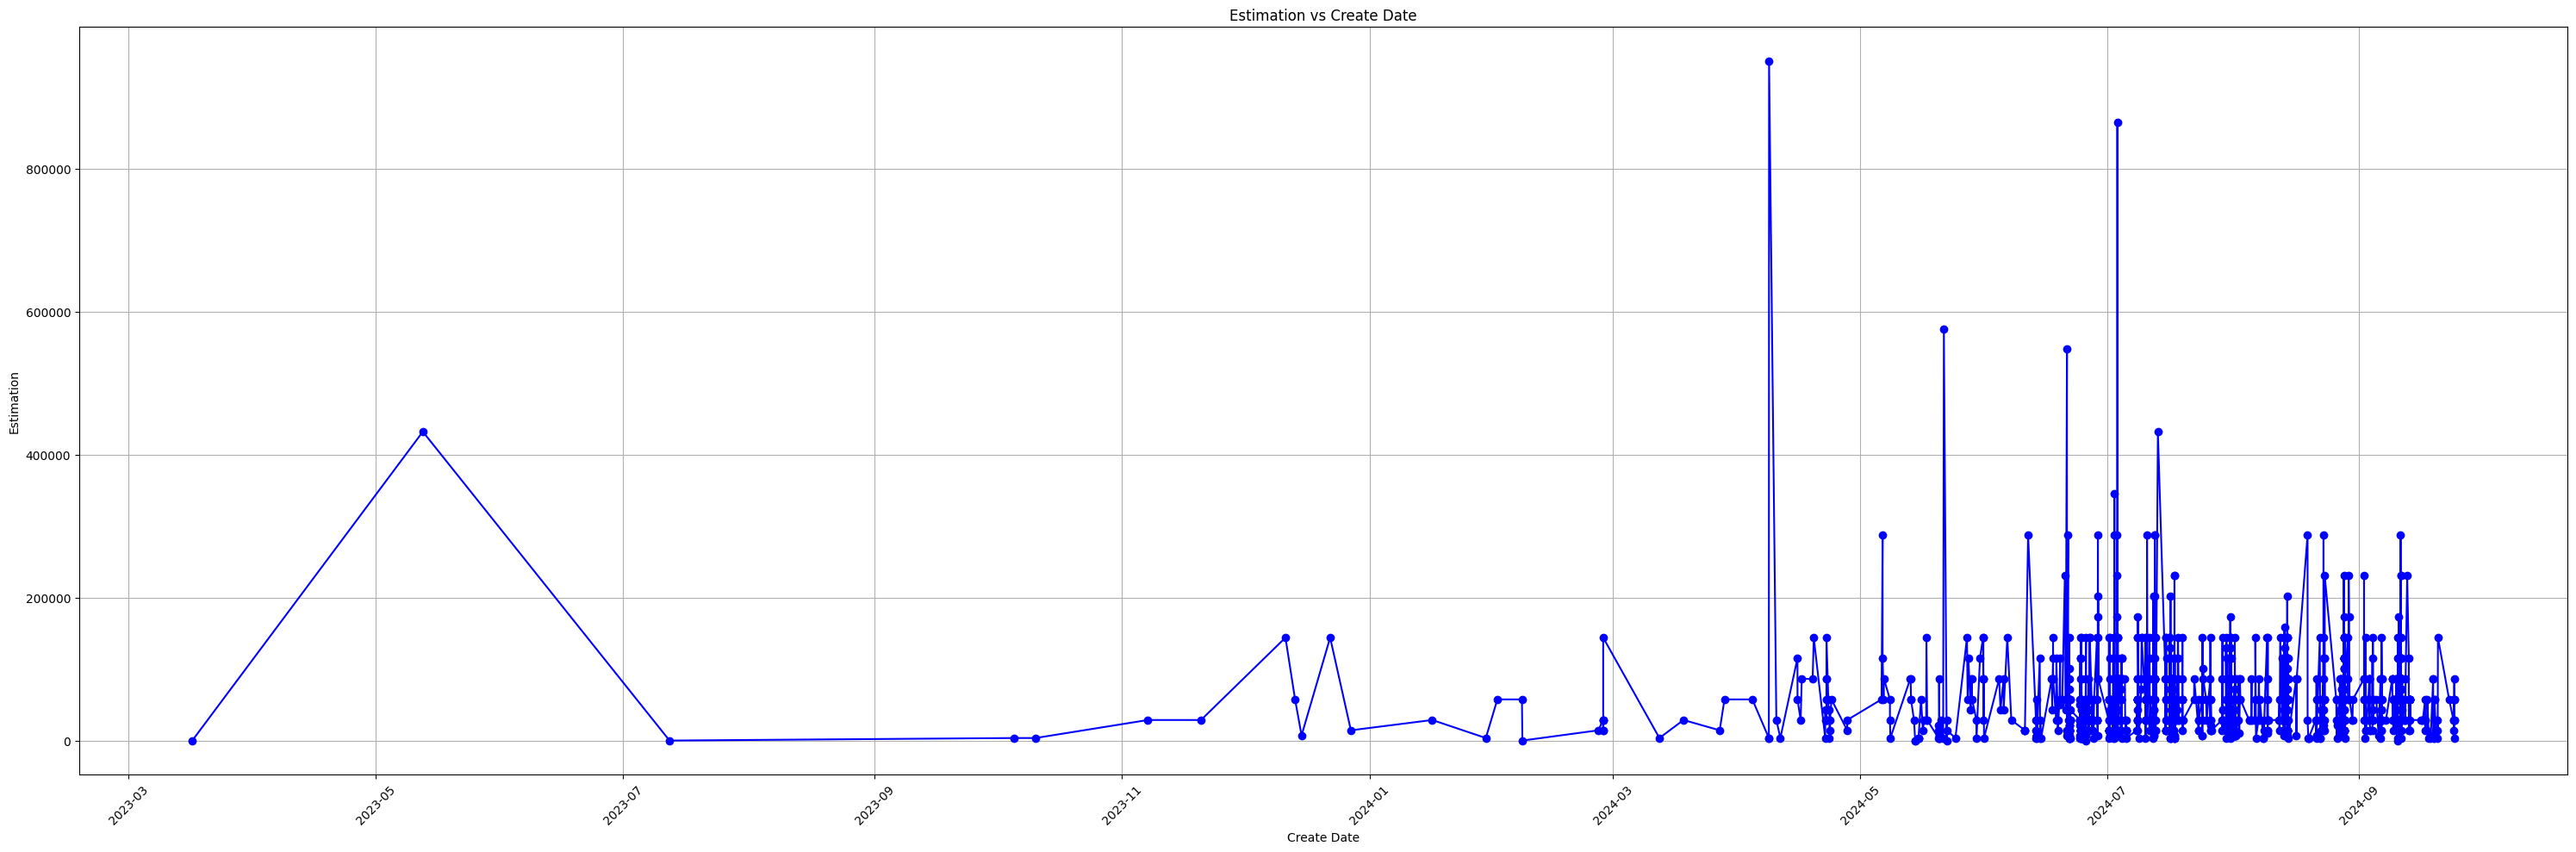

In [411]:
df.dropna(subset=['estimation'], inplace=True)

df['estimation'] = df['estimation'].apply(lambda x: float(x) // 3600)

plt.figure(figsize=(30, 10))
plt.plot(df['create_date'], df['estimation'], marker='o', linestyle='-', color='b')
plt.title('Estimation vs Create Date')
plt.xlabel('Create Date')
plt.ylabel('Estimation')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [412]:
df['year'] = df['create_date'].dt.year
df['month'] = df['create_date'].dt.month
df['day'] = df['create_date'].dt.day
df['hour'] = df['create_date'].dt.hour
df['minute'] = df['create_date'].dt.minute

/tmp/ipykernel_30/170265455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['create_date'].dt.year
/tmp/ipykernel_30/170265455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['create_date'].dt.month
/tmp/ipykernel_30/170265455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [413]:
X = df[['year', 'month', 'day', 'hour', 'minute']]
y = df['estimation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [414]:
model = CatBoostRegressor(iterations=1000, learning_rate=0.3, depth=4, verbose=200)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 60750.4326556	test: 52417.1709389	best: 52417.1709389 (0)	total: 628us	remaining: 628ms
200:	learn: 39780.2517581	test: 65899.3188898	best: 52417.1709389 (0)	total: 83.3ms	remaining: 331ms
400:	learn: 34088.0998443	test: 68798.5204260	best: 52417.1709389 (0)	total: 165ms	remaining: 247ms
600:	learn: 30704.5481388	test: 70551.1424428	best: 52417.1709389 (0)	total: 248ms	remaining: 165ms
800:	learn: 27810.3566414	test: 71618.2678853	best: 52417.1709389 (0)	total: 330ms	remaining: 82ms
999:	learn: 26120.1055060	test: 72631.1999438	best: 52417.1709389 (0)	total: 412ms	remaining: 0us

bestTest = 52417.17094
bestIteration = 0

Shrink model to first 1 iterations.


In [415]:
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [416]:
mse

2747559809.24217

In [417]:
r2

-0.003120667951225009

In [418]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

In [419]:
# y_pred = model.predict(X_test)

# # Оценка качества модели
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [420]:
mse

2747559809.24217

In [421]:
r2

-0.003120667951225009

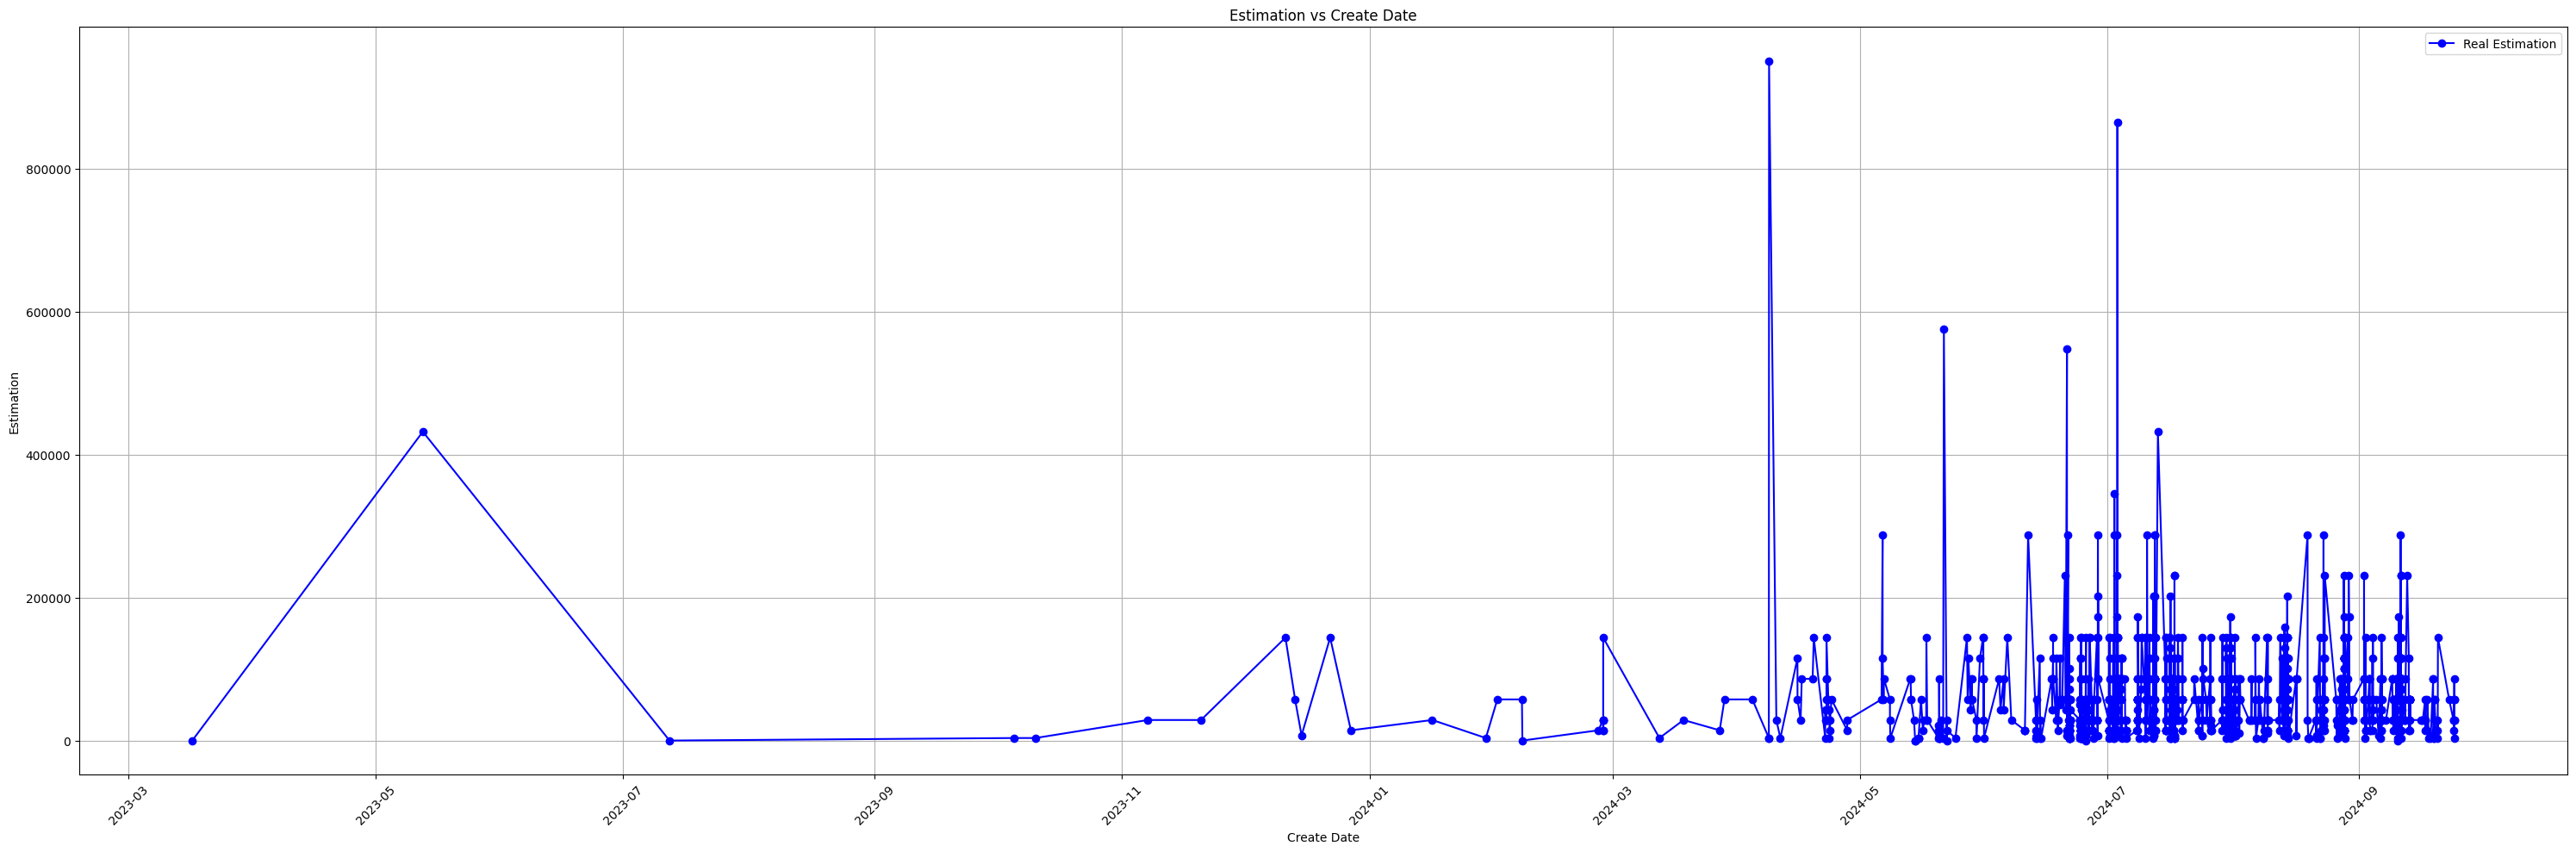

In [422]:
plt.figure(figsize=(30, 10))

plt.plot(df['create_date'], df['estimation'], marker='o', linestyle='-', color='b', label='Real Estimation')

plt.title('Estimation vs Create Date')
plt.xlabel('Create Date')
plt.ylabel('Estimation')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [423]:
X_test = pd.to_datetime(X_test)

In [424]:
df['create_date'].max()

Timestamp('2024-09-24 12:22:30.450001')

In [425]:
start_date = df['create_date'].max()
dates = pd.date_range(start=start_date, periods=200, freq='D')

In [426]:
dates = pd.DataFrame(dates)
dates

,0
0,2024-09-24 12:22:30.450001
1,2024-09-25 12:22:30.450001
2,2024-09-26 12:22:30.450001
3,2024-09-27 12:22:30.450001
4,2024-09-28 12:22:30.450001
...,...
195,2025-04-07 12:22:30.450001
196,2025-04-08 12:22:30.450001
197,2025-04-09 12:22:30.450001
198,2025-04-10 12:22:30.450001


In [427]:
dates.columns

RangeIndex(start=0, stop=1, step=1)

In [428]:
dates['year'] = dates[0].dt.year
dates['month'] = dates[0].dt.month
dates['day'] = dates[0].dt.day
dates['hour'] = dates[0].dt.hour
dates['minute'] = dates[0].dt.minute

In [429]:
y_pred = model.predict(dates)

In [430]:
dates

,0,year,month,day,hour,minute
0,2024-09-24 12:22:30.450001,2024,9,24,12,22
1,2024-09-25 12:22:30.450001,2024,9,25,12,22
2,2024-09-26 12:22:30.450001,2024,9,26,12,22
3,2024-09-27 12:22:30.450001,2024,9,27,12,22
4,2024-09-28 12:22:30.450001,2024,9,28,12,22
...,...,...,...,...,...,...
195,2025-04-07 12:22:30.450001,2025,4,7,12,22
196,2025-04-08 12:22:30.450001,2025,4,8,12,22
197,2025-04-09 12:22:30.450001,2025,4,9,12,22
198,2025-04-10 12:22:30.450001,2025,4,10,12,22


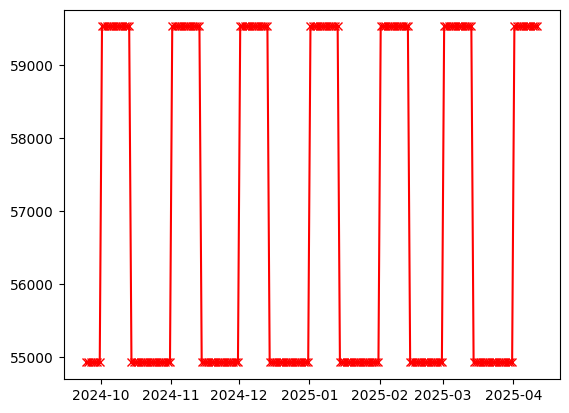

In [431]:
plt.plot(pd.to_datetime(dates.drop(0, axis=1)), y_pred, marker='x', linestyle='-', color='r', label='Predicted Estimation')

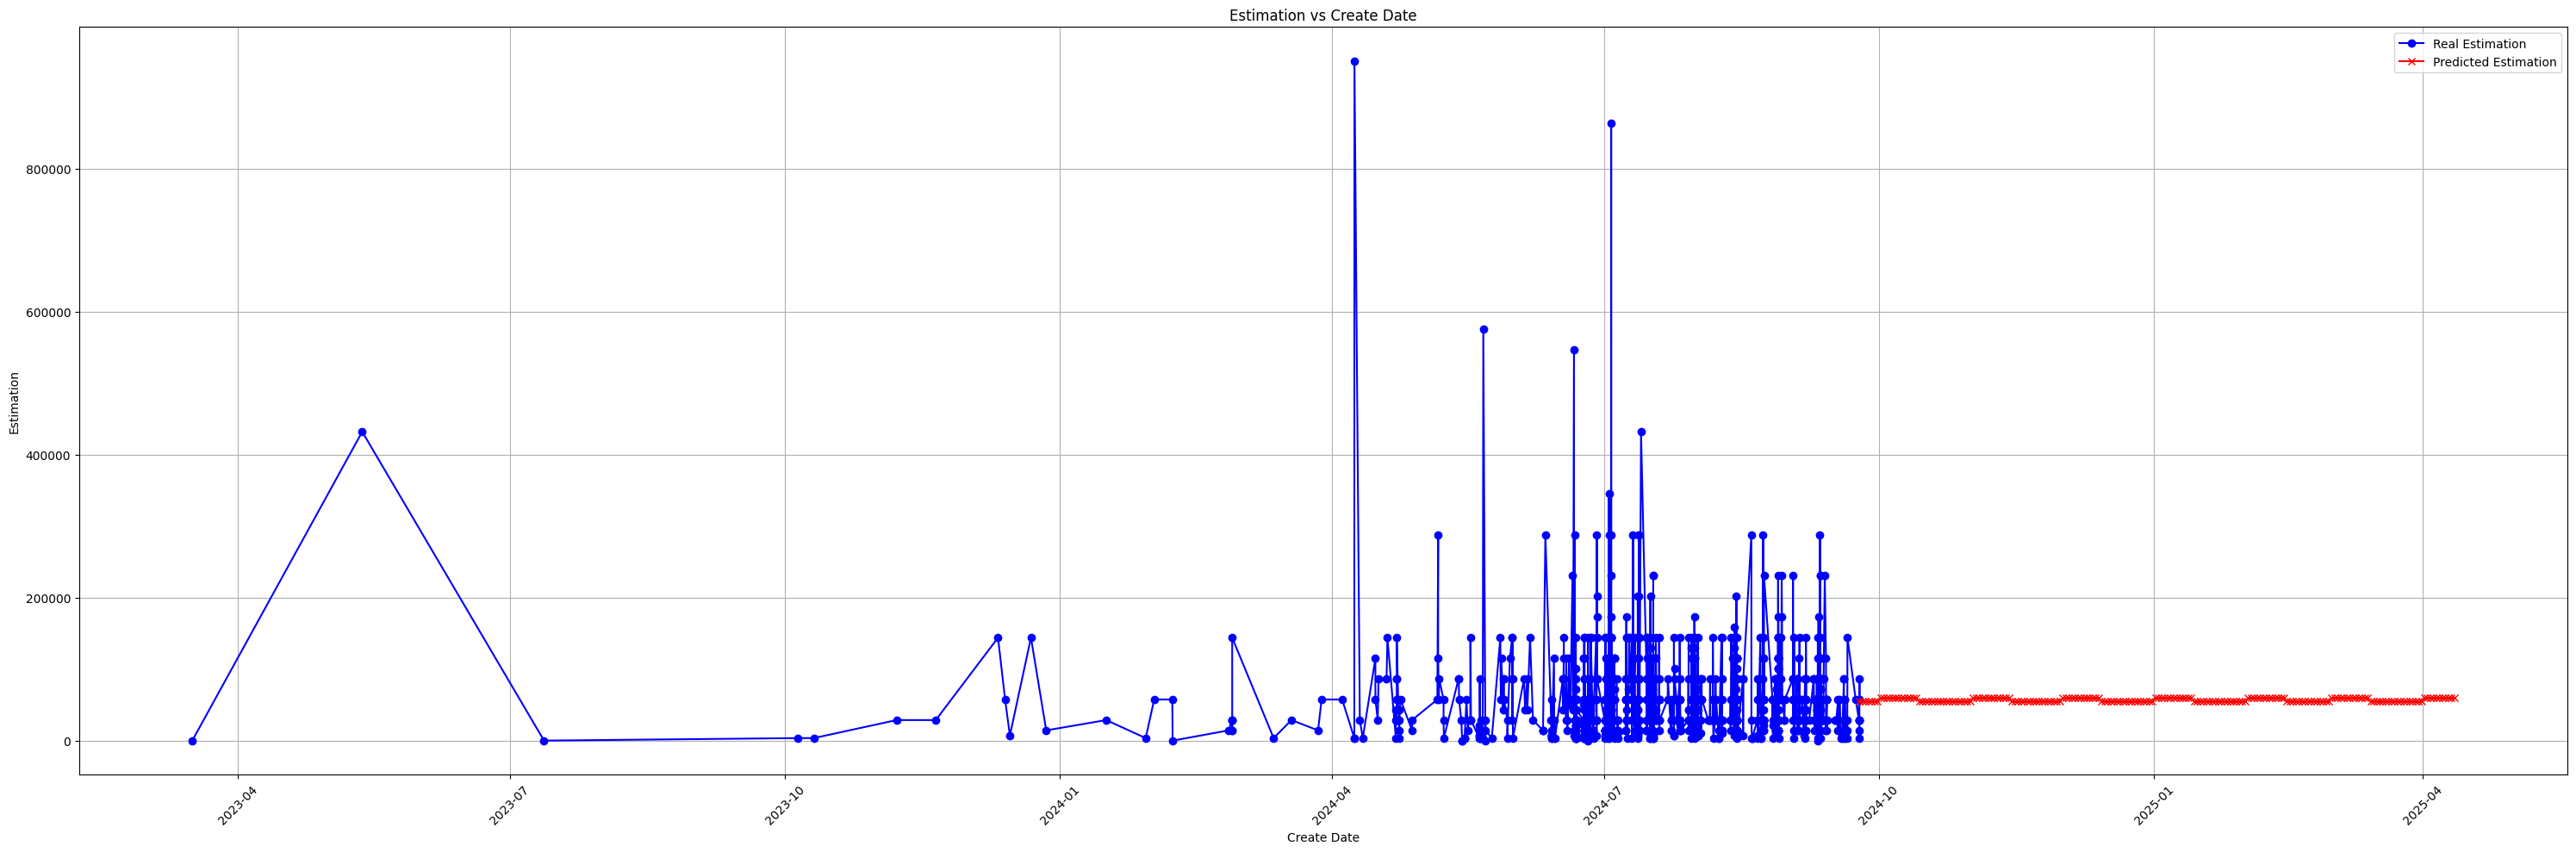

In [432]:
plt.figure(figsize=(30, 10))

plt.plot(df['create_date'], df['estimation'], marker='o', linestyle='-', color='b', label='Real Estimation')

plt.plot(pd.to_datetime(dates.drop(0, axis=1)), y_pred, marker='x', linestyle='-', color='r', label='Predicted Estimation')

plt.title('Estimation vs Create Date')
plt.xlabel('Create Date')
plt.ylabel('Estimation')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [433]:
X = df[['year', 'month', 'day', 'hour', 'minute']].values
y = df['estimation'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 16)
        self.fc2 = nn.Linear(16, 1)
        # self.fc3 = nn.Linear(32, 16)
        # self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = torch.relu(self.fc2(x))
        # x = torch.relu(self.fc3(x))
        # x = self.fc4(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

print('Predictions:', y_pred.squeeze().tolist())
print('True Values:', y_test.tolist())

Epoch [10/1000], Loss: 2613500416.0000
Epoch [20/1000], Loss: 1390870656.0000
Epoch [30/1000], Loss: 868146048.0000
Epoch [40/1000], Loss: 4141357568.0000
Epoch [50/1000], Loss: 1678582144.0000
Epoch [60/1000], Loss: 842395520.0000
Epoch [70/1000], Loss: 1322972416.0000
Epoch [80/1000], Loss: 1092684032.0000
Epoch [90/1000], Loss: 441110016.0000
Epoch [100/1000], Loss: 616510336.0000
Epoch [110/1000], Loss: 2151220736.0000
Epoch [120/1000], Loss: 4119106048.0000
Epoch [130/1000], Loss: 444593504.0000
Epoch [140/1000], Loss: 856747520.0000
Epoch [150/1000], Loss: 111788640.0000
Epoch [160/1000], Loss: 818341120.0000
Epoch [170/1000], Loss: 1373047040.0000
Epoch [180/1000], Loss: 532760.8750
Epoch [190/1000], Loss: 828965312.0000
Epoch [200/1000], Loss: 1342044416.0000
Epoch [210/1000], Loss: 1130433536.0000
Epoch [220/1000], Loss: 1369532288.0000
Epoch [230/1000], Loss: 2246077184.0000
Epoch [240/1000], Loss: 328318320640.0000
Epoch [250/1000], Loss: 2429019136.0000
Epoch [260/1000], Lo

In [434]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [435]:
mse

3281152984.3237925

In [436]:
r2

0.0013040379405034885

In [440]:
X

array([[2023,    3,   16,   16,   59],
       [2023,    5,   12,   13,   33],
       [2023,    7,   12,    9,   36],
       ...,
       [2024,    9,   24,   12,   19],
       [2024,    9,   24,   12,   21],
       [2024,    9,   24,   12,   22]], dtype=int32)

In [452]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']]).astype(np.int64) // 10**9

features = ['timestamp']
target = 'estimation'

X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X_train, y_train = create_sequences(X_train, seq_length)
X_test, y_test = create_sequences(X_test, seq_length)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs.squeeze(), y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

predictions = test_outputs.squeeze().numpy()
print(predictions)

/tmp/ipykernel_30/3924563207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']]).astype(np.int64) // 10**9
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1285, 1])) that is different to the input size (torch.Size([1285])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.7714
Epoch [20/100], Loss: 0.7714
Epoch [30/100], Loss: 0.7714
Epoch [40/100], Loss: 0.7714
Epoch [50/100], Loss: 0.7714
Epoch [60/100], Loss: 0.7714
Epoch [70/100], Loss: 0.7714
Epoch [80/100], Loss: 0.7714
Epoch [90/100], Loss: 0.7714
Epoch [100/100], Loss: 0.7714
Test Loss: 1.7863
[0.02329586 0.02329577 0.02329584 0.02329577 0.02329584 0.02329586
 0.02329549 0.02329608 0.02329628 0.02329601 0.02329592 0.023296
 0.02329585 0.02329582 0.02329598 0.02329633 0.02329515 0.02329692
 0.02329641 0.02329594 0.02329645 0.02329624 0.02329614 0.02329624
 0.02329618 0.02329618 0.02329618 0.02329612 0.02329621 0.02329627
 0.02329608 0.02329628 0.02329628 0.0232961  0.0232963  0.02329611
 0.02329643 0.02329603 0.02329642 0.02329633 0.02329623 0.02329642
 0.02329622 0.0232963  0.02329604 0.02329566 0.02329658 0.02329747
 0.02329498 0.02329884 0.02329662 0.02329186 0.02330295 0.02329735
 0.02329664 0.02328967 0.02330706 0.02324905 0.02336072 0.0232945
 0.02331254 0.0232971  0

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([319, 1])) that is different to the input size (torch.Size([319])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [446]:
X_train.unsqueeze(-1)

tensor([[[[-11.2237]],

         [[ -9.9029]],

         [[ -8.4897]]],


        [[[ -9.9029]],

         [[ -8.4897]],

         [[ -6.5174]]],


        [[[ -8.4897]],

         [[ -6.5174]],

         [[ -6.3932]]],


        ...,


        [[[  1.1022]],

         [[  1.1022]],

         [[  1.1022]]],


        [[[  1.1022]],

         [[  1.1022]],

         [[  1.1023]]],


        [[[  1.1022]],

         [[  1.1023]],

         [[  1.1023]]]])